<a href="https://colab.research.google.com/github/shahriyarredlearn/CSE-475-Machine-Learning/blob/main/CSE475Lab1_2019_3_60_098.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"alshahriyar","key":"59bdd8c8528afb229338eedacc479cb4"}'}

In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
!kaggle datasets download -d joybiswas5/mangoleafbd


Dataset URL: https://www.kaggle.com/datasets/joybiswas5/mangoleafbd
License(s): unknown
mangoleafbd.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
# Re-extract the dataset with overwrite to ensure correct structure
!unzip -o mangoleafbd.zip -d mangoleafbd


Archive:  mangoleafbd.zip
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124312 (Custom).jpg  
  infl

In [12]:
# List the contents of each subdirectory in 'mangoleafbd' if they exist
for category in os.listdir("mangoleafbd"):
    category_path = os.path.join("mangoleafbd", category)
    if os.path.isdir(category_path):  # Only proceed if it's a directory
        print(f"Contents of '{category_path}':", os.listdir(category_path)[:5])  # Display first 5 items


Contents of 'mangoleafbd/MangoLeafBD Dataset': ['Anthracnose', 'Gall Midge', 'Healthy', 'Cutting Weevil', 'Bacterial Canker']


In [13]:
from glob import glob

# Define base directory and collect image paths
base_dir = './mangoleafbd/'
image_paths = glob(os.path.join(base_dir, "*/*.jpg"))
print(f"Number of images found: {len(image_paths)}")
print("Sample image paths:", image_paths[:5])


Number of images found: 0
Sample image paths: []


In [14]:
# Update the base directory to reflect the actual structure
base_dir = './mangoleafbd/MangoLeafBD Dataset/'


In [15]:
from glob import glob

# Collect image paths with the corrected base directory
image_paths = glob(os.path.join(base_dir, "*/*.jpg"))
print(f"Number of images found: {len(image_paths)}")
print("Sample image paths:", image_paths[:5])


Number of images found: 4000
Sample image paths: ['./mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124256 (Custom).jpg', './mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211011_165908 (Custom).jpg', './mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124341 (Custom).jpg', './mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211008_124252 (Custom).jpg', './mangoleafbd/MangoLeafBD Dataset/Anthracnose/20211011_165901 (Custom).jpg']


In [16]:
import pandas as pd

# Create the DataFrame with image paths and labels
labels = [os.path.basename(os.path.dirname(path)) for path in image_paths]
data_df = pd.DataFrame({'image_path': image_paths, 'label': labels})

# Display the first few rows to confirm
print(data_df.head())


                                          image_path        label
0  ./mangoleafbd/MangoLeafBD Dataset/Anthracnose/...  Anthracnose
1  ./mangoleafbd/MangoLeafBD Dataset/Anthracnose/...  Anthracnose
2  ./mangoleafbd/MangoLeafBD Dataset/Anthracnose/...  Anthracnose
3  ./mangoleafbd/MangoLeafBD Dataset/Anthracnose/...  Anthracnose
4  ./mangoleafbd/MangoLeafBD Dataset/Anthracnose/...  Anthracnose


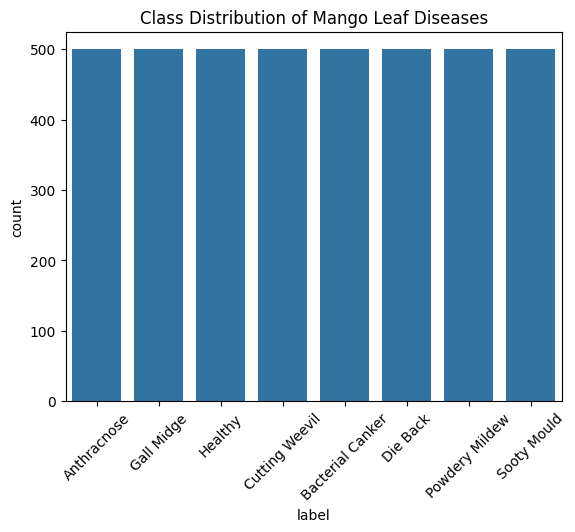

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_df, x='label')
plt.xticks(rotation=45)
plt.title("Class Distribution of Mango Leaf Diseases")
plt.show()


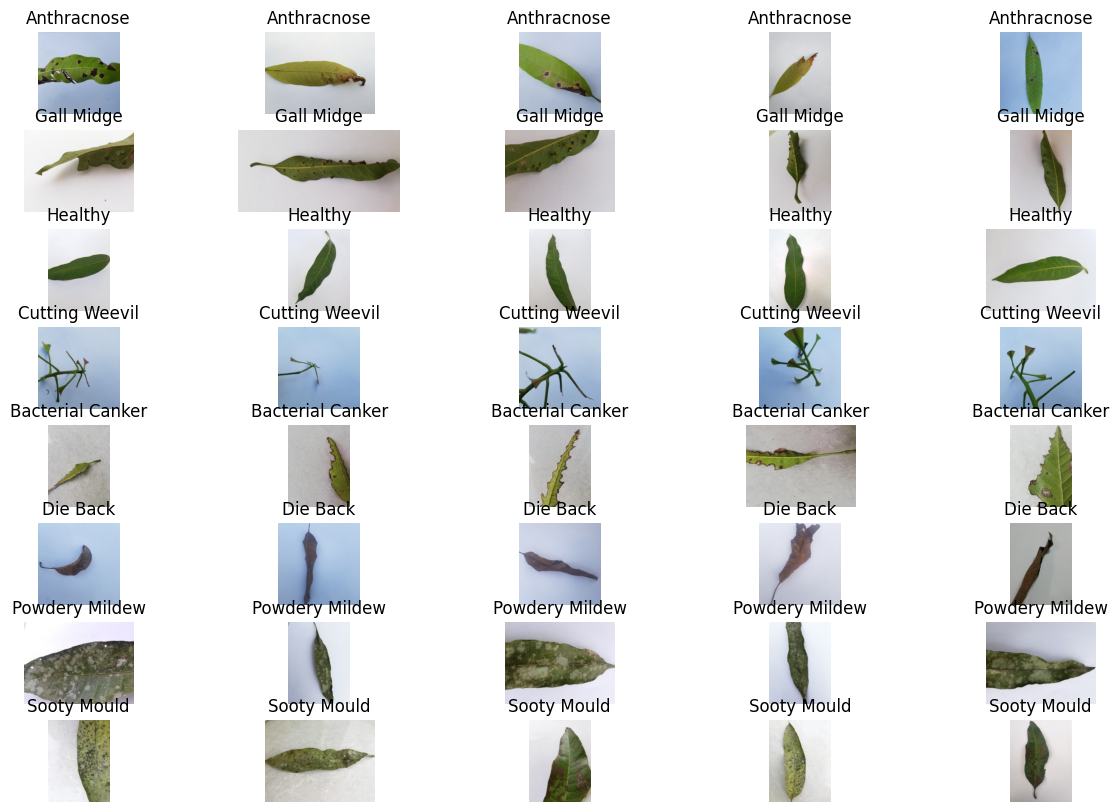

In [18]:
import cv2
import matplotlib.pyplot as plt

def display_samples(df, samples_per_class=5):
    classes = df['label'].unique()
    plt.figure(figsize=(15, 10))
    for idx, label in enumerate(classes):
        sample_paths = df[df['label'] == label]['image_path'].sample(samples_per_class)
        for i, img_path in enumerate(sample_paths):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(classes), samples_per_class, idx * samples_per_class + i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(label)
    plt.show()

display_samples(data_df)


In [19]:
# Check the dimensions of the first image
img = cv2.imread(data_df['image_path'][0])
print("Image Dimensions:", img.shape)


Image Dimensions: (320, 240, 3)


In [20]:
import numpy as np

# Set the image size
img_width, img_height = 240, 320

# Initialize a list for storing flattened image features
features = []

for path in data_df['image_path']:
    img = cv2.imread(path)
    img = cv2.resize(img, (img_width, img_height))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = img.flatten()  # Flatten to a 1D array
    features.append(img)

# Convert to a NumPy array
features = np.array(features)
print("Features shape:", features.shape)


Features shape: (4000, 76800)


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_df['encoded_label'] = label_encoder.fit_transform(data_df['label'])


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, data_df['encoded_label'], test_size=0.2, random_state=42)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Classification Report")
print(classification_report(y_test, dt_predictions))


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.62      0.47      0.54       123
           1       0.66      0.64      0.65       104
           2       0.82      0.94      0.88       101
           3       0.63      0.80      0.71        90
           4       0.35      0.37      0.36        86
           5       0.62      0.50      0.55       112
           6       0.47      0.47      0.47        91
           7       0.44      0.48      0.46        93

    accuracy                           0.58       800
   macro avg       0.58      0.59      0.58       800
weighted avg       0.59      0.58      0.58       800



In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.84      0.84      0.84       104
           2       0.93      0.98      0.95       101
           3       0.84      0.91      0.87        90
           4       0.69      0.80      0.74        86
           5       0.89      0.73      0.80       112
           6       0.75      0.77      0.76        91
           7       0.76      0.71      0.73        93

    accuracy                           0.81       800
   macro avg       0.81      0.82      0.81       800
weighted avg       0.82      0.81      0.81       800



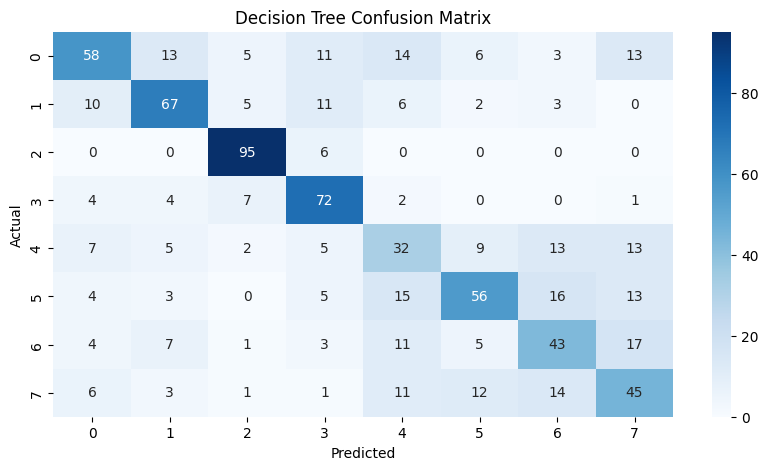

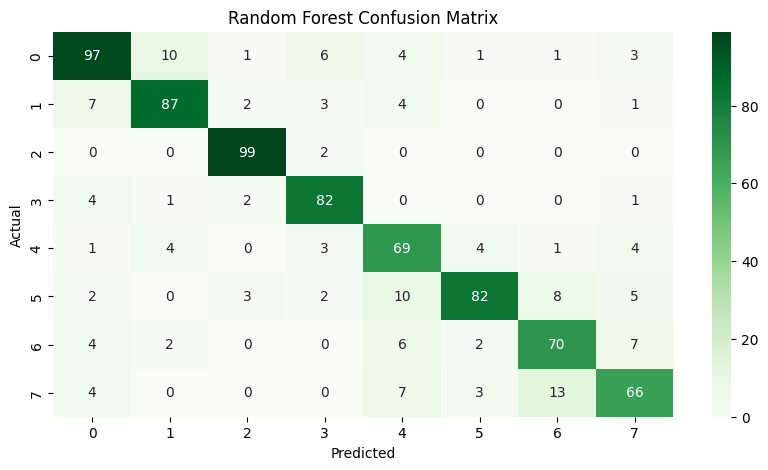

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(10, 5))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
